In [1]:
%matplotlib inline
import pandas as pd

In [47]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Orlando Vargas,2005
1,Niu-Peng,1989
2,Anandabhadram,2005
3,Mahendra Varma,1993
4,Beomdiga shidae,1970


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [10]:
titles.title.value_counts().head(10)

Hamlet                  19
Carmen                  14
Macbeth                 14
The Three Musketeers    12
Blood Money             11
The Outsider            11
She                     11
Maya                    11
Eva                     10
Kismet                  10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [19]:
t = titles[titles.year // 10 == 193]
t.year.value_counts().head(3)

1937    1185
1936    1127
1938    1115
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [26]:
(titles.year // 10 * 10).value_counts().sort_index() # take the year and round it down, then * 10 to make it look lik
# like the decade, then count the value for each 'year'. then sort the index from smallest to greatest

1890        6
1900       36
1910     6346
1920     8657
1930     9964
1940     8308
1950    12110
1960    16508
1970    17793
1980    19293
1990    21294
2000    37706
2010    56531
2020       39
Name: year, dtype: int64

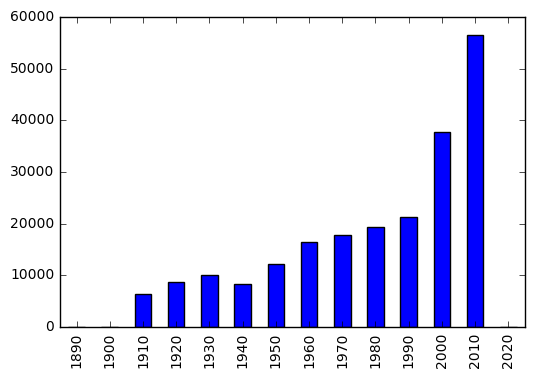

In [88]:
(titles.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

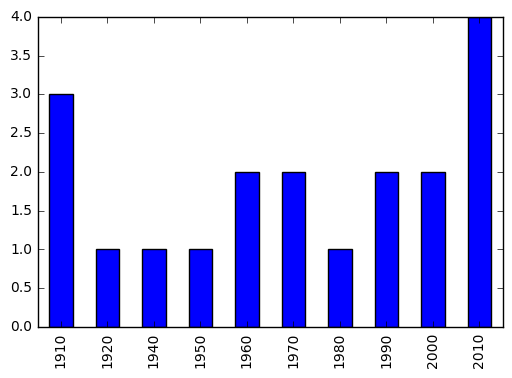

In [89]:
t = titles[titles.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

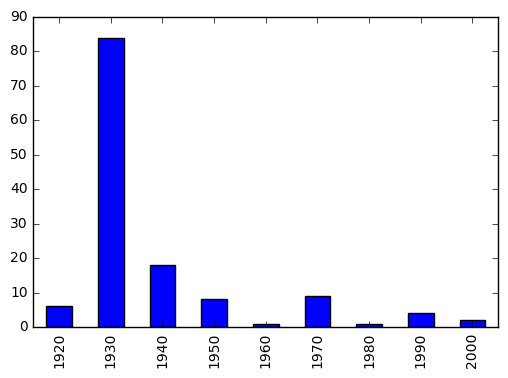

In [90]:
t = cast[cast.character == "Rustler"]
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

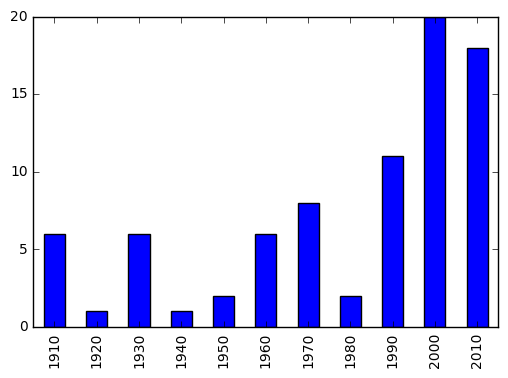

In [91]:
t = cast[cast.character == "Hamlet"]
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [34]:
cast.character.value_counts().head(11)

Himself        18926
Dancer         11015
Extra           8638
Reporter        7593
Doctor          6803
Policeman       6470
Student         6390
Nurse           6127
Bartender       6123
Minor Role      5830
Party Guest     5820
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [42]:
c = cast[cast.character == "Herself"]
c.name.value_counts().head(10)

Joyce Brothers        14
Queen Elizabeth II    11
Margaret Thatcher      8
Joan Rivers            7
Mary Jo Pehl           7
Rekha                  5
Juhi Chawla            5
Caroline Rhea          5
Chris Evert            5
Marilyn Monroe         5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [43]:
c = cast[cast.character == "Himself"]
c.name.value_counts().head(10)

Adolf Hitler             93
Richard Nixon            39
Ronald Reagan            31
John F. Kennedy          26
Ron Jeremy               24
George W. Bush           20
Bill Clinton             20
Franklin D. Roosevelt    20
Winston Churchill        20
Martin Luther King       19
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [48]:
c = cast[cast.year == 1945]
c = c.name.value_counts().head(1)
c

Emmett Vogan    39
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [ ]:
c = cast[cast.year == 1985]
c = c.name.value_counts().head(1)
c

### Plot how many roles Mammootty has played in each year of his career.

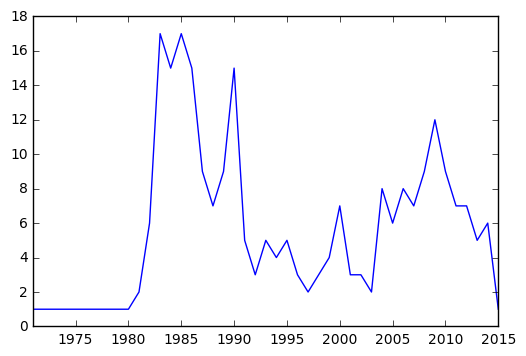

In [51]:
c = cast[cast.name == 'Mammootty']
c.year.value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [61]:
c = cast[cast.character.str.startswith('Patron in')]
c.character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             3
Patron in Club                   3
Patron in Restaurant             3
Patron in cabaret                3
Patron in booth                  2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [87]:
cast[cast.character.str.startswith('Science')].character.value_counts().head(10)


Science Teacher         53
Science Student          8
Science Fair Student     8
Science Fair Judge       6
Science Club Member      5
Science Reporter         5
Science Kid              4
Science Promo Cadet      4
Science teacher          3
Science Officer          3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

/home/matthew/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


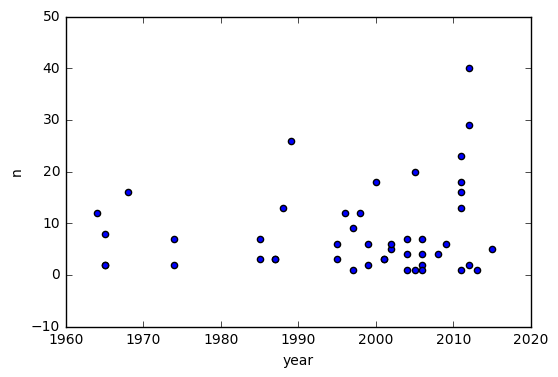

In [94]:
c = cast
c = c[c.name == 'Judi Dench'].sort('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

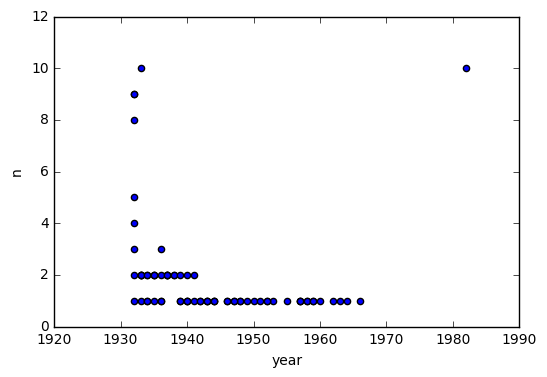

In [96]:
c = cast[cast.name == 'Cary Grant']
c.plot(x='year',y='n',kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

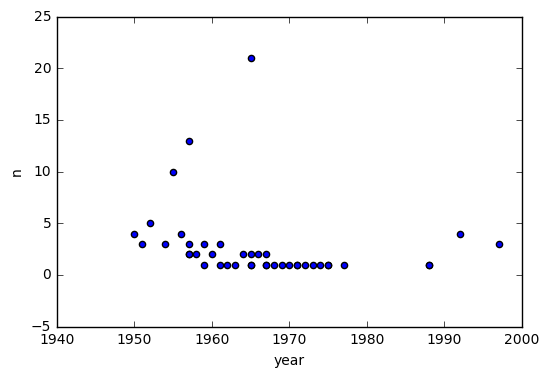

In [98]:
c = cast
c = c[c.name == 'Sidney Poitier']
c.plot(x='year',y='n',kind='scatter')

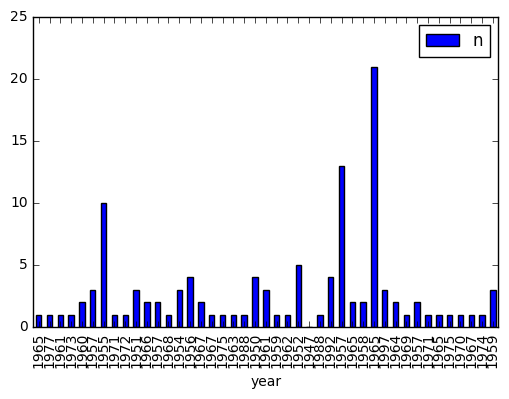

In [99]:
c = cast
c = c[c.name == 'Sidney Poitier']
c.plot(x='year',y='n',kind='bar') # This bar plot is bad, because high numbers are bad for n.

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [106]:
c = cast
c = c[(c.n == 1) & (c.year // 10 == 195) & (c.type == 'actor')]
len(c)

6375

In [108]:
c = cast
c = c[(c.n == 1) & (c.year // 10 == 195) & (c.type == 'actress')]
len(c)

2813

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [116]:
c = cast
c = c[(c.n == 2) & (c.year // 10 == 195) & (c.type=='actor')]
len(c)

4377

In [115]:
c = cast
c = c[(c.n == 2) & (c.year // 10 == 195) & (c.type=='actress')]
len(c)

4399

In [117]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 2]
c.type.value_counts()

actress    4399
actor      4377
Name: type, dtype: int64